In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

Raíces encontradas para diferentes tolerancias:

Tolerancia: 1e-01 -> Raíz: 1.975367, Iteraciones: 6
Tolerancia: 1e-02 -> Raíz: 1.998050, Iteraciones: 9
Tolerancia: 1e-04 -> Raíz: 1.999988, Iteraciones: 15
Tolerancia: 1e-06 -> Raíz: 2.000000, Iteraciones: 20
Tolerancia: 1e-08 -> Raíz: 2.000000, Iteraciones: 26
Tolerancia: 1e-10 -> Raíz: 2.000000, Iteraciones: 31


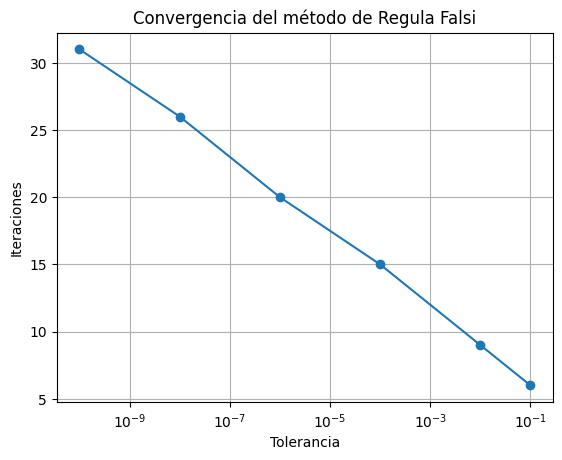

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
    """Método de Regula Falsi para encontrar la raíz de f en [a,b]"""
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")

    for i in range(max_iter):
        # Punto de intersección lineal
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))

        if abs(f(c)) < tol:
            return c, i + 1  # raíz y número de iteraciones

        # Actualización del intervalo
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c

    raise RuntimeError("No se alcanzó la tolerancia deseada en las iteraciones dadas.")

# Función de prueba: f(x) = x^2 - 4 (raíz en x = ±2)
f = lambda x: x**2 - 4

# Probar con diferentes tolerancias y analizar convergencia
tolerancias = [1e-1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10]
iteraciones = []

print("Raíces encontradas para diferentes tolerancias:\n")
for tol in tolerancias:
    raiz, iters = regula_falsi(f, a=0, b=5, tol=tol)
    iteraciones.append(iters)
    print(f"Tolerancia: {tol:.0e} -> Raíz: {raiz:.6f}, Iteraciones: {iters}")

# Graficar convergencia
plt.plot(tolerancias, iteraciones, marker='o')
plt.xscale('log')
plt.xlabel('Tolerancia')
plt.ylabel('Iteraciones')
plt.title('Convergencia del método de Regula Falsi')
plt.grid(True)
plt.show()

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

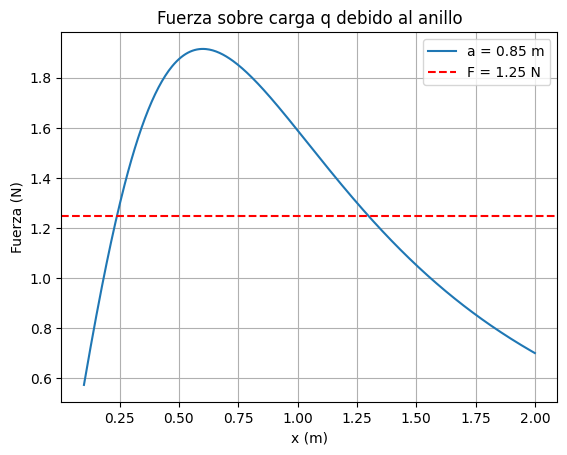

Newton-Raphson: x ≈ 0.239443 m
Método de la secante: x ≈ 1470488133206.107422 m


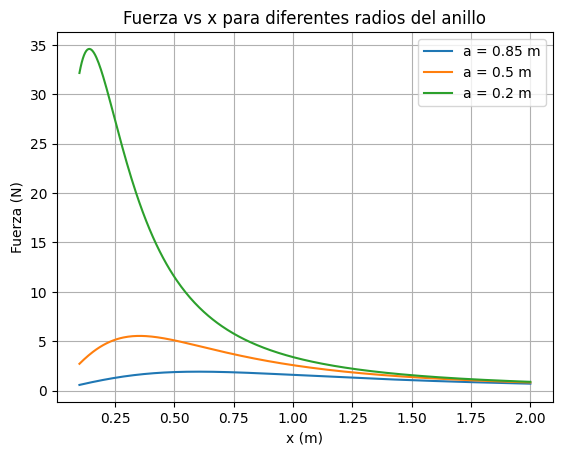

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Constantes físicas
epsilon_0 = 8.854e-12  # C^2/(N·m^2)
q = 2e-5  # C
Q = 2e-5  # C
k = 1 / (4 * np.pi * epsilon_0)

# Función de fuerza
def fuerza(x, a):
    return k * q * Q * x / ((x**2 + a**2)**(3/2))

# Función objetivo para encontrar raíz: F(x) - F_obj = 0
def fuerza_objetivo(x, a, F_obj):
    return fuerza(x, a) - F_obj

# Derivada para Newton-Raphson
def df_dx(x, a):
    num = (x**2 + a**2)**(3/2) - (3 * x**2) * (x**2 + a**2)**(1/2)
    denom = (x**2 + a**2)**3
    return k * q * Q * num / denom

# Método de la secante
def secante(f, x0, x1, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        fx0, fx1 = f(x0), f(x1)
        if abs(fx1 - fx0) < 1e-12:
            break  # evitar división por cero
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(f(x2)) < tol:
            return x2
        x0, x1 = x1, x2
    return x1

# Parámetros
a = 0.85
F_target = 1.25

# Rango para la gráfica
x_vals = np.linspace(0.1, 2.0, 400)
F_vals = fuerza(x_vals, a)

# Gráfico de la fuerza
plt.plot(x_vals, F_vals, label=f'a = {a} m')
plt.axhline(F_target, color='r', linestyle='--', label='F = 1.25 N')
plt.xlabel('x (m)')
plt.ylabel('Fuerza (N)')
plt.title('Fuerza sobre carga q debido al anillo')
plt.grid(True)
plt.legend()
plt.show()

# --- Método de Newton-Raphson ---
x_newton = newton(func=fuerza_objetivo, x0=0.5, fprime=lambda x, a, F_obj: df_dx(x, a), args=(a, F_target))
print(f"Newton-Raphson: x ≈ {x_newton:.6f} m")

# --- Método de la secante ---
f_sec = lambda x: fuerza_objetivo(x, a, F_target)
x_secante = secante(f_sec, 0.1, 2.0)
print(f"Método de la secante: x ≈ {x_secante:.6f} m")

# --- Efecto de reducir el radio ---
a_vals = [0.85, 0.5, 0.2]
plt.figure()
for a_i in a_vals:
    F_plot = fuerza(x_vals, a_i)
    plt.plot(x_vals, F_plot, label=f'a = {a_i} m')

plt.xlabel('x (m)')
plt.ylabel('Fuerza (N)')
plt.title('Fuerza vs x para diferentes radios del anillo')
plt.legend()
plt.grid(True)
plt.show()

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



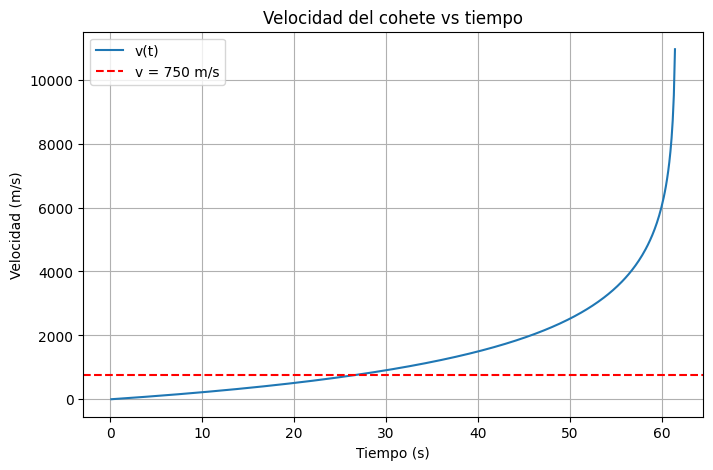

Newton-Raphson: t ≈ 26.4078 s
Bisección: t ≈ 26.4078 s
Regula-Falsi: t ≈ 26.4078 s


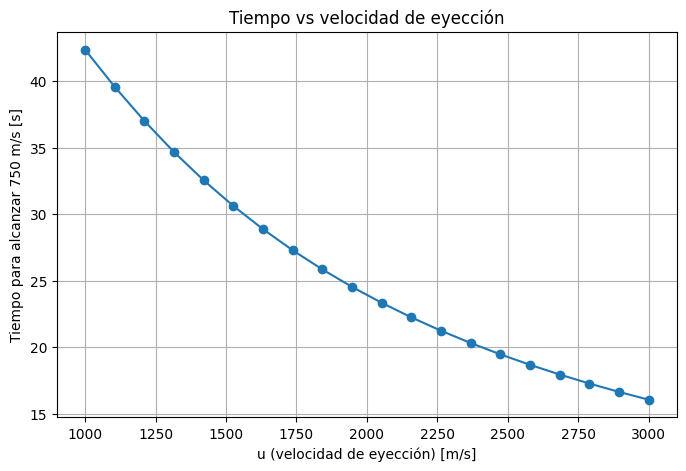

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect

# Constantes físicas
g = 9.81  # m/s²
m0 = 1.6e5  # kg
q = 2600   # kg/s
u = 1800   # m/s

# Función de velocidad
def v_cohete(t, u, m0=m0, q=q, g=g):
    if t >= m0/q:  # Evita división por cero o masa negativa
        return np.nan
    return u * np.log(m0 / (m0 - q * t)) - g * t

# Dominio de tiempo válido (t < m0/q)
t_vals = np.linspace(0.1, m0/q - 0.1, 500)
v_vals = [v_cohete(t, u) for t in t_vals]

plt.figure(figsize=(8,5))
plt.plot(t_vals, v_vals, label='v(t)')
plt.axhline(750, color='r', linestyle='--', label='v = 750 m/s')
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Velocidad del cohete vs tiempo")
plt.grid()
plt.legend()
plt.show()

def funcion_objetivo(t, u=u):
    return v_cohete(t, u) - 750

def derivada_v(t, u=u, h=1e-5):
    return (v_cohete(t + h, u) - v_cohete(t - h, u)) / (2 * h)

# Newton-Raphson
t_nr = newton(funcion_objetivo, x0=10, fprime=lambda t: derivada_v(t))
print(f"Newton-Raphson: t ≈ {t_nr:.4f} s")

# Intervalo válido (debe contener cambio de signo)
t_bis = bisect(funcion_objetivo, 1, 50)
print(f"Bisección: t ≈ {t_bis:.4f} s")

def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        raise ValueError("No hay cambio de signo en el intervalo.")

    for _ in range(max_iter):
        c = (a * fb - b * fa) / (fb - fa)
        fc = f(c)
        if abs(fc) < tol:
            return c
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return c

# Regula Falsi
t_rf = regula_falsi(funcion_objetivo, 1, 50)
print(f"Regula-Falsi: t ≈ {t_rf:.4f} s")

u_vals = np.linspace(1000, 3000, 20)
t_750_list = []

for ui in u_vals:
    f_obj = lambda t: v_cohete(t, ui) - 750
    try:
        t_sol = bisect(f_obj, 1, m0/q - 0.1)
        t_750_list.append(t_sol)
    except:
        t_750_list.append(np.nan)

# Gráfica
plt.figure(figsize=(8,5))
plt.plot(u_vals, t_750_list, marker='o')
plt.xlabel("u (velocidad de eyección) [m/s]")
plt.ylabel("Tiempo para alcanzar 750 m/s [s]")
plt.title("Tiempo vs velocidad de eyección")
plt.grid()
plt.show()